## Introduction 

The dataset consists of Women’s fashion online shop reviews, consisting of 
-a title 
-a review text
-recommendation for the product

We have to perform text analytics on the above given dataset to build a model which could predict if the reviewer would recomend the product or not based on his/her reviews. 

Here we are already provided with the recommendation (Not recommended = 0 ; recommended = 1) unlike the ground truth where one just has the reviews and not the ground truth that if a person has actually recommended the product or not. The bright side here is that we can compare the recommendation predictions from our model with the existing data of recommendation, which provides us the precision of the model performance.

We would be using various techniques to see their effects on our model and lastly come out with the best model suited for this dataset which provides more accuracy and precision.  

In [1]:
#Importing required libraries to read the data file.
import pandas as pd 
import numpy as np

In [2]:
#Importing the dataset to the Notebook and reading it.
dataset= pd.read_csv("/Users/Lenovo/Desktop/hw5_data_train.csv")
dataset.head()

,Title,Review,Recommended
0,Beautiful unique dress,Wore this to my sons wedding. found it last mi...,1
1,Had high hopes but...,"Gals, if you absolutely must have this top wai...",0
2,Buttons -buttons so cute!,I hardly believe i have not reviewed htis yet....,1
3,Love this dress,This dress is so cute and comfortable. i'm nor...,1
4,Perfect summer pants!,The linen- cotton blend breathes so well for a...,1


In [3]:
#Checking for Null values.
dataset.isnull().values.any()

True

In [4]:
#The dataset ony contains blank spaces with no actual missing values, we replace the blank spaces for ease of anlaysis. 
dataset = dataset.fillna(" ")
dataset.isnull().values.any()

False

In [5]:
#Count plotting the recommendations in the dataset. 
import seaborn as sns 
sns.countplot(dataset['Recommended'])

More than 14,000 reviwers have recommended the products and around 3,000 reviwers have not recommended the products.

## Task 1 - TITLE AND BODY 

We have only used the Logistic Regression classifier here as we have to use one. We can also use the SVM, MutinomialNB etc as classifiers which is used in Task 4.

### 1.1 Data with Title only

#### Classification Modelling 1.1

In [6]:
#Specifying dataset with only title and the target
X_Title = dataset["Title"]
y = dataset["Recommended"]

In [7]:
#CountVectorizing (To convert text into vectors)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [8]:
CV1 = vect.fit_transform(X_Title, y)
CV1_fit = vect.fit(X_Title, y)

In [9]:
#Classifier model 1.1
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=100)
classifier.fit(CV1 , y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=100, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
#Predicting the recommendations using the model
CV1_pred = classifier.predict(CV1)

In [11]:
#Printing out the model parameters for performance comparision
from sklearn import metrics
from sklearn.metrics import precision_recall_curve,auc,average_precision_score,roc_auc_score

print('average_precision_score', average_precision_score(y, CV1_pred))
print('roc_auc_score', roc_auc_score(y, CV1_pred))

average_precision_score 0.9081857682042104
roc_auc_score 0.7653541044266927


In [12]:
#Creating a function for building confusion matrix for models 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, 
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

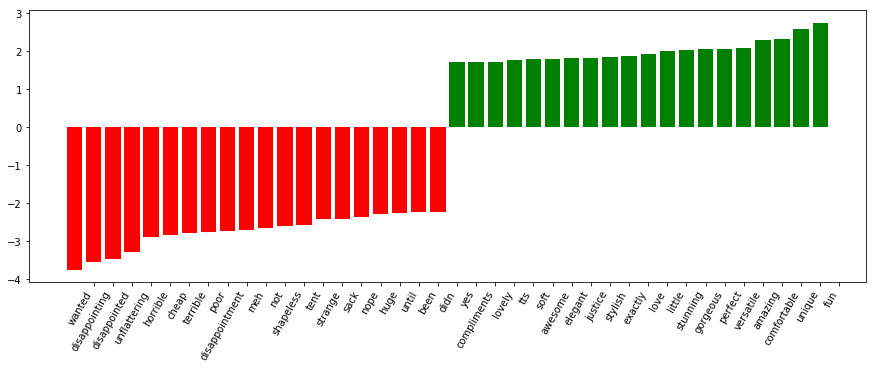

In [13]:
#Visualizing the top model features 
import matplotlib.pyplot as plt

##Feature Selection (Top20)
top_features=20
feature_names=vect.get_feature_names()
coef = classifier.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-top_features:]
top_negative_coefficients = np.argsort(coef)[:top_features]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

##Plotting the selected features 
plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'green' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
plt.show()

Confusion matrix, without normalization
[[ 1739  1390]
 [  363 14122]]


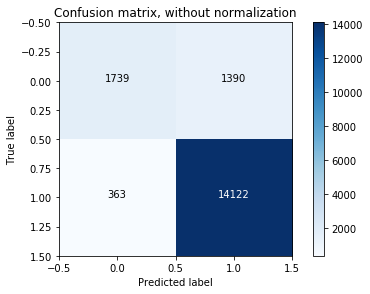

In [14]:
#Confusion Matrix for the model 1.1 
cnf_matrix = confusion_matrix(y, CV1_pred)
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')

#### Classification Modelling 1.1 with Regularization 

average_precision_score 0.8665534036650817
roc_auc_score 0.6434060846714066


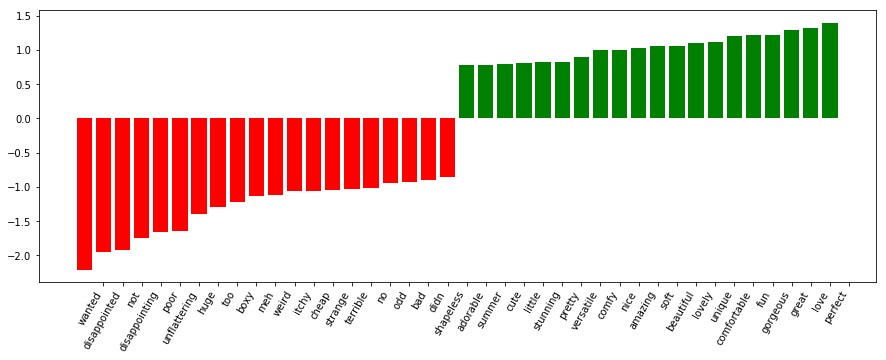

In [15]:
#We have combined all the processes for modelling as done above in model 1.1.
#Modelling and Visualization model 1.1 with regularization.
X_Title = dataset["Title"]
y = dataset["Recommended"]

vect = CountVectorizer()
CV1R = vect.fit_transform(X_Title, y)
CV1R_fit = vect.fit(X_Title, y)

classifier = LogisticRegression(random_state=100,C=0.1)
classifier.fit(CV1R , y)

CV1R_pred = classifier.predict(CV1R)

print('average_precision_score', average_precision_score(y, CV1R_pred))
print('roc_auc_score', roc_auc_score(y, CV1R_pred))

top_features=20
feature_names=vect.get_feature_names()
coef = classifier.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-top_features:]
top_negative_coefficients = np.argsort(coef)[:top_features]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'green' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
plt.show()

Confusion matrix, without normalization
[[  959  2170]
 [  285 14200]]


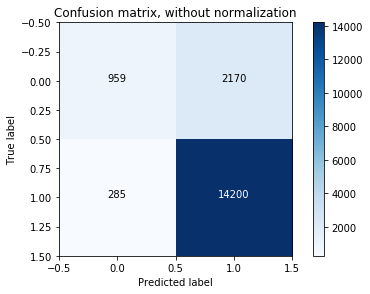

In [16]:
#Confusion Matrix model 1.1 with Regularization
cnf_matrix = confusion_matrix(y, CV1R_pred)
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')

### Data with Review only 

#### Classification Modelling 1.2

average_precision_score 0.9634652300301422
roc_auc_score 0.9114446976975442


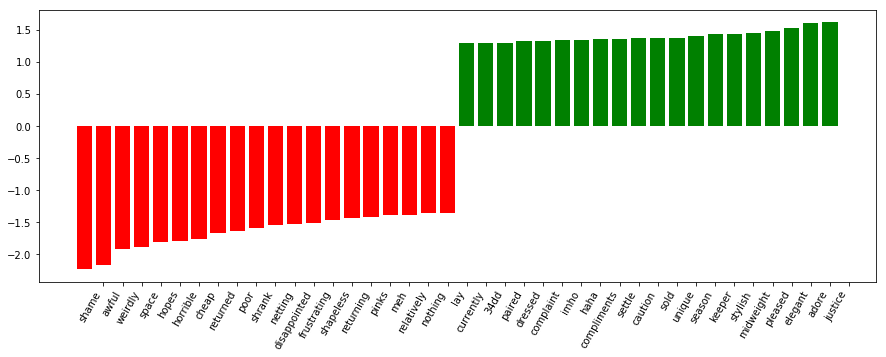

In [17]:
#1.2 
X_Review = dataset["Review"]
y = dataset["Recommended"]

vect = CountVectorizer()
CV2 = vect.fit_transform(X_Review, y)
CV2_fit = vect.fit(X_Review, y)

classifier = LogisticRegression(random_state=100)
classifier.fit(CV2 , y)

CV2_pred = classifier.predict(CV2)

print('average_precision_score', average_precision_score(y, CV2_pred))
print('roc_auc_score', roc_auc_score(y, CV2_pred))

top_features=20
feature_names=vect.get_feature_names()
coef = classifier.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-top_features:]
top_negative_coefficients = np.argsort(coef)[:top_features]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'green' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
plt.show()

Confusion matrix, without normalization
[[ 2615   514]
 [  186 14299]]


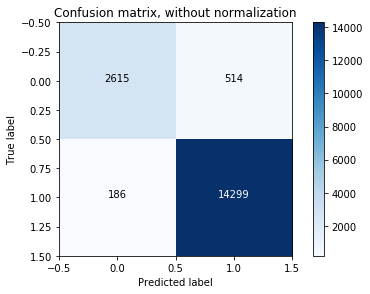

In [18]:
#Confusion Matrix model 1.2
cnf_matrix = confusion_matrix(y, CV2_pred)
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')

#### Classification Modelling 1.2 with Regularization 

average_precision_score 0.9273945409644633
roc_auc_score 0.8178961650523299


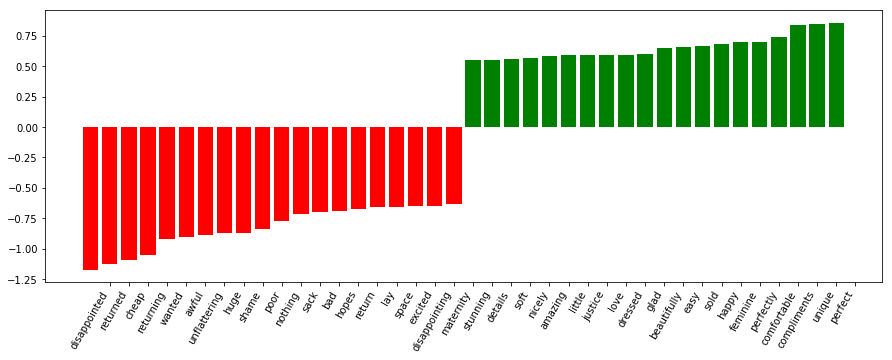

In [19]:
#1.2 with regularization 
X_Review = dataset["Review"]
y = dataset["Recommended"]

vect = CountVectorizer()
CV2R = vect.fit_transform(X_Review, y)
CV2R_fit = vect.fit(X_Review, y)

classifier = LogisticRegression(random_state=100,C=0.1)
classifier.fit(CV2R , y)

CV2R_pred = classifier.predict(CV2R)

print('average_precision_score', average_precision_score(y, CV2R_pred))
print('roc_auc_score', roc_auc_score(y, CV2R_pred))

top_features=20
feature_names=vect.get_feature_names()
coef = classifier.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-top_features:]
top_negative_coefficients = np.argsort(coef)[:top_features]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'green' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
plt.show()

Confusion matrix, without normalization
[[ 2065  1064]
 [  350 14135]]


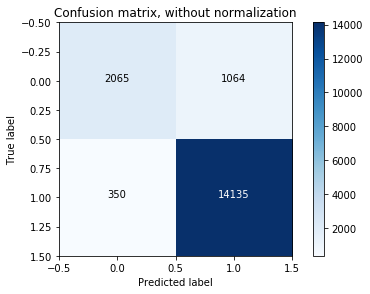

In [20]:
#Confusion Matrix model 1.2 with Regularization
cnf_matrix = confusion_matrix(y, CV2R_pred)
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')

### Data with Title and Review (Concatenate)

#### Classification Modelling 1.3

average_precision_score 0.9711285695356211
roc_auc_score 0.9304079897510269


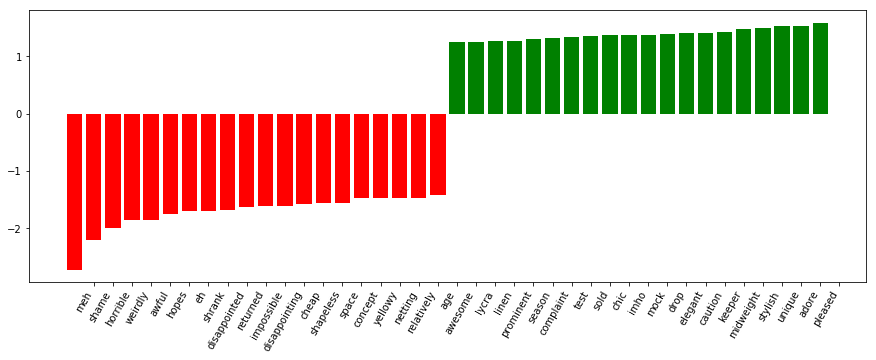

In [21]:
#1.3
X_TR = dataset['Title'] + [" "] + dataset['Review']
y = dataset["Recommended"]

vect = CountVectorizer()
CV3 = vect.fit_transform(X_TR, y)
CV3_fit = vect.fit(X_TR, y)

classifier = LogisticRegression(random_state=100)
classifier.fit(CV3 , y)

CV3_pred = classifier.predict(CV3)

print('average_precision_score', average_precision_score(y, CV3_pred))
print('roc_auc_score', roc_auc_score(y, CV3_pred))

top_features=20
feature_names=vect.get_feature_names()
coef = classifier.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-top_features:]
top_negative_coefficients = np.argsort(coef)[:top_features]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'green' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
plt.show()

Confusion matrix, without normalization
[[ 2730   399]
 [  169 14316]]


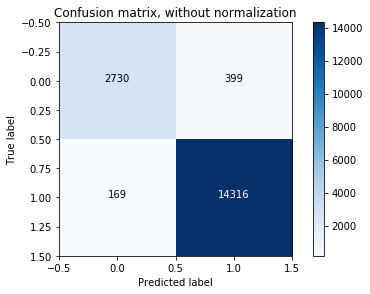

In [22]:
#Confusion Matrix model 1.3
cnf_matrix = confusion_matrix(y, CV3_pred)
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')

#### Classification Modelling 1.3 with Regularization 

average_precision_score 0.9401526057337607
roc_auc_score 0.8516424734020812


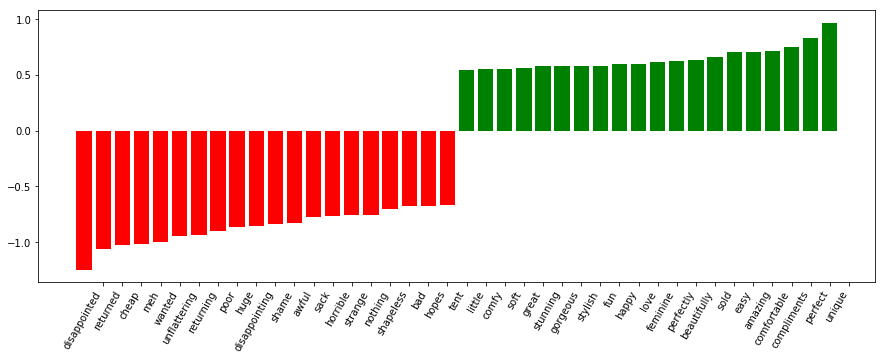

In [23]:
#1.3 with Regularization
X_TR = dataset['Title'] + [" "] + dataset['Review']
y = dataset["Recommended"]

vect = CountVectorizer()
CV3R = vect.fit_transform(X_TR, y)
CV3R_fit = vect.fit(X_TR, y)

classifier = LogisticRegression(random_state=100,C=0.1)
classifier.fit(CV3R , y)

CV3R_pred = classifier.predict(CV3R)

print('average_precision_score', average_precision_score(y, CV3R_pred))
print('roc_auc_score', roc_auc_score(y, CV3R_pred))

top_features=20
feature_names=vect.get_feature_names()
coef = classifier.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-top_features:]
top_negative_coefficients = np.argsort(coef)[:top_features]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'green' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
plt.show()

Confusion matrix, without normalization
[[ 2271   858]
 [  326 14159]]


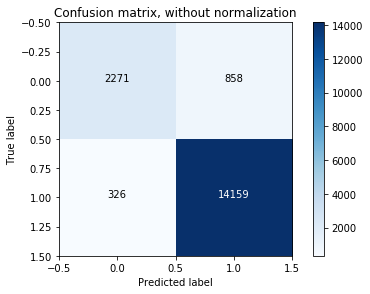

In [24]:
#Confusion Matrix model 1.3 with Regularization
cnf_matrix = confusion_matrix(y, CV3R_pred)
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')

### Data with vectors of Title and Review Concatented 

#### Classification Modelling 1.4

average_precision_score 0.9711285695356211
roc_auc_score 0.9304079897510269


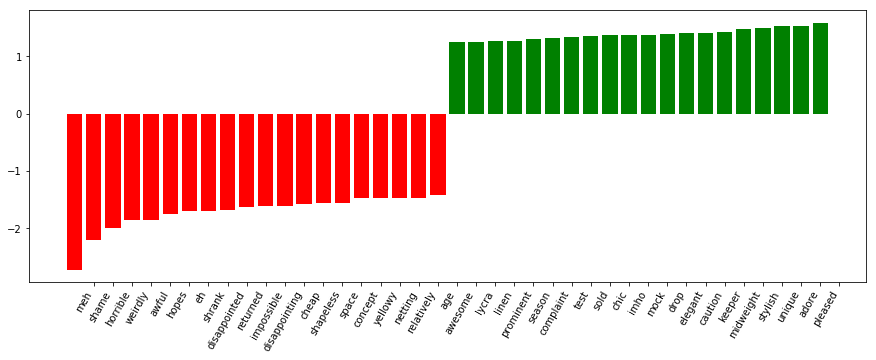

In [25]:
#1.4
X_Title = dataset["Title"]
X_Review = dataset['Review']
y = dataset["Recommended"]

X_VTR = ["{} {}".format(X_Title, X_Review) for X_Title, X_Review in zip(X_Title, X_Review)]

vect = CountVectorizer()
CV4 = vect.fit_transform(X_VTR, y)
CV4_fit = vect.fit(X_VTR, y)

classifier = LogisticRegression(random_state=100)
classifier.fit(CV4 , y)

CV4_pred = classifier.predict(CV4)

print('average_precision_score', average_precision_score(y, CV4_pred))
print('roc_auc_score', roc_auc_score(y, CV4_pred))

top_features=20
feature_names=vect.get_feature_names()
coef = classifier.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-top_features:]
top_negative_coefficients = np.argsort(coef)[:top_features]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'green' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
plt.show()

Confusion matrix, without normalization
[[ 2730   399]
 [  169 14316]]


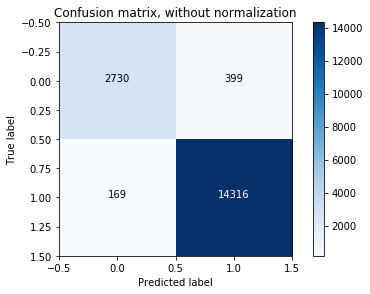

In [26]:
#Confusion Matrix model 1.4
cnf_matrix = confusion_matrix(y, CV4_pred)
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')

#### Classification Modelling 1.4 with Regularization 

average_precision_score 0.9401526057337607
roc_auc_score 0.8516424734020812


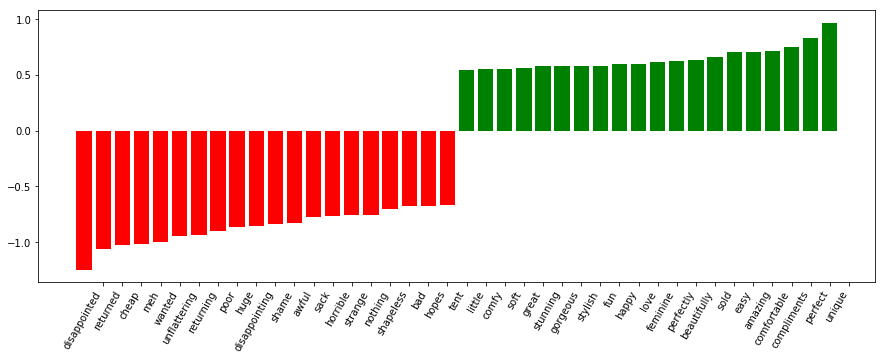

In [27]:
#1.4 with regularization
X_Title = dataset["Title"]
X_Review = dataset['Review']
y = dataset["Recommended"]

X_VTR = ["{} {}".format(X_Title, X_Review) for X_Title, X_Review in zip(X_Title, X_Review)]

vect = CountVectorizer()
CV4R = vect.fit_transform(X_VTR, y)
CV4R_fit = vect.fit(X_VTR, y)

classifier = LogisticRegression(random_state=100,C=0.1)
classifier.fit(CV4R , y)

CV4R_pred = classifier.predict(CV4R)

print('average_precision_score', average_precision_score(y, CV4R_pred))
print('roc_auc_score', roc_auc_score(y, CV4R_pred))

top_features=20
feature_names=vect.get_feature_names()
coef = classifier.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-top_features:]
top_negative_coefficients = np.argsort(coef)[:top_features]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'green' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
plt.show()

Confusion matrix, without normalization
[[ 2271   858]
 [  326 14159]]


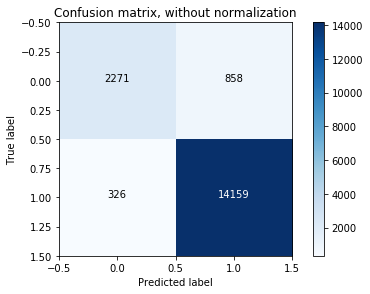

In [28]:
#Confusion Matrix model 1.4 with Regularization
cnf_matrix = confusion_matrix(y, CV4R_pred)
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')

## Observations Task 1

The accuracies/average precision score of all the models are as follows:
- Model 1.1          =0.908
- Model 1.1 with Reg =0.866
- Model 1.2          =0.963 
- Model 1.2 with Reg =0.927 
- Model 1.3          =0.971
- Model 1.3 with Reg =0.940

The model 1.3 (Using concatenate Title & Review data without regularization) has the best precision in predicting the recommendation and it works the best. It has high accuarcy and the AUC score is 0.93. Also, the confusion matrix shows 14316 True Positives and 2730 True Negatives which also suggests higher precision than other models.

## Task 2 -Feature Tuning

We now use the data with concatenated title and review only for the further tasks as instructed.

### Using TfidfVectorizer instead of CountVectorizer 

average_precision_score 0.9245155406738077
roc_auc_score 0.8102977115767482


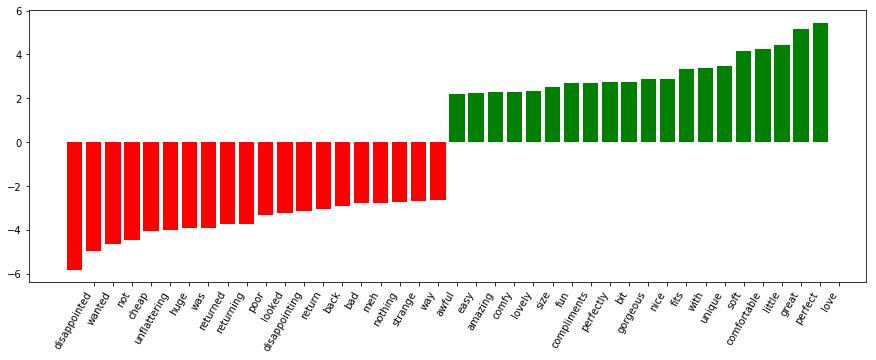

In [29]:
# Classification Modelling 2.1
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
X_TR = dataset['Title'] + [" "] + dataset['Review']
y = dataset["Recommended"]

vect = TfidfVectorizer()
CV3R = vect.fit_transform(X_TR, y)
CV3R_fit = vect.fit(X_TR, y)

classifier = LogisticRegression(random_state=100 )
classifier.fit(CV3R , y)

CV3R_pred = classifier.predict(CV3R)

print('average_precision_score', average_precision_score(y, CV3R_pred))
print('roc_auc_score', roc_auc_score(y, CV3R_pred))

top_features=20
feature_names=vect.get_feature_names()
coef = classifier.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-top_features:]
top_negative_coefficients = np.argsort(coef)[:top_features]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'green' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
plt.show()

Confusion matrix, without normalization
[[ 2006  1123]
 [  297 14188]]


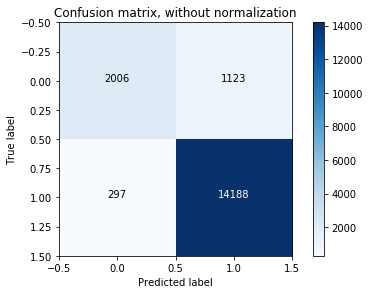

In [30]:
#Confusion Matrix model 2.1
cnf_matrix = confusion_matrix(y, CV3R_pred)
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')

### Using Normalization with CountVectorizer 

average_precision_score 0.9711285695356211
roc_auc_score 0.9304079897510269


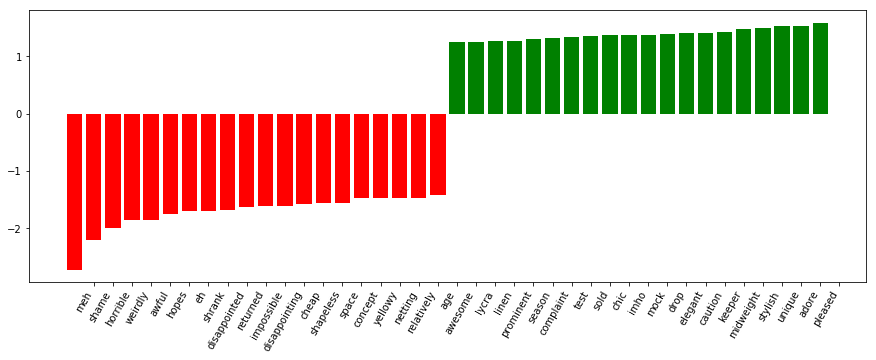

In [56]:
# Classification Modelling 2.2
from sklearn.preprocessing import Normalizer

X_TR = dataset['Title'] + [" "] + dataset['Review']
y = dataset["Recommended"]

vect = CountVectorizer(Normalizer)
CV3R = vect.fit_transform(X_TR, y)
CV3R_fit = vect.fit(X_TR, y)

classifier = LogisticRegression(random_state=100)
classifier.fit(CV3R , y)

CV3R_pred = classifier.predict(CV3R)

print('average_precision_score', average_precision_score(y, CV3R_pred))
print('roc_auc_score', roc_auc_score(y, CV3R_pred))

top_features=20
feature_names=vect.get_feature_names()
coef = classifier.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-top_features:]
top_negative_coefficients = np.argsort(coef)[:top_features]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'green' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
plt.show()

Confusion matrix, without normalization
[[ 2730   399]
 [  169 14316]]


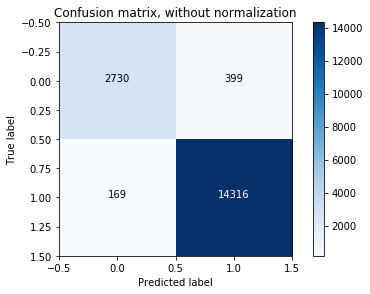

In [32]:
#Confusion Matrix model 2.2
cnf_matrix = confusion_matrix(y, CV3R_pred)
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')

### Using Stop-words

average_precision_score 0.9203532905705629
roc_auc_score 0.799110848848717


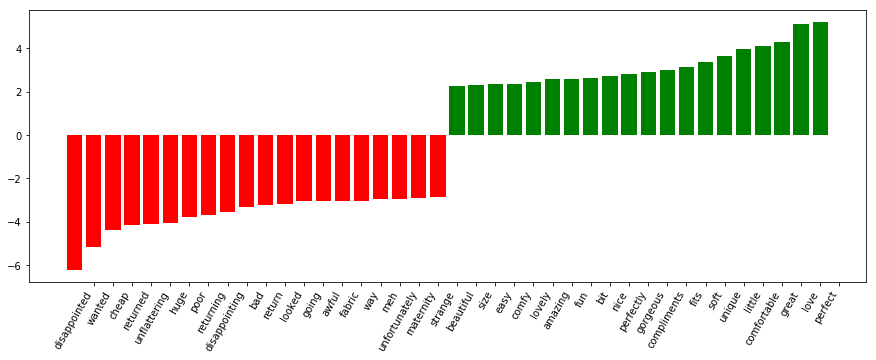

In [57]:
#Classification Modelling 2.3
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

X_TR = dataset['Title'] + [" "] + dataset['Review']
y = dataset["Recommended"]

vect = TfidfVectorizer(stop_words='english')
CV3R = vect.fit_transform(X_TR, y)
CV3R_fit = vect.fit(X_TR, y)

classifier = LogisticRegression(random_state=100)
classifier.fit(CV3R , y)

CV3R_pred = classifier.predict(CV3R)

print('average_precision_score', average_precision_score(y, CV3R_pred))
print('roc_auc_score', roc_auc_score(y, CV3R_pred))

top_features=20
feature_names=vect.get_feature_names()
coef = classifier.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-top_features:]
top_negative_coefficients = np.argsort(coef)[:top_features]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'green' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
plt.show()

Confusion matrix, without normalization
[[ 1928  1201]
 [  260 14225]]


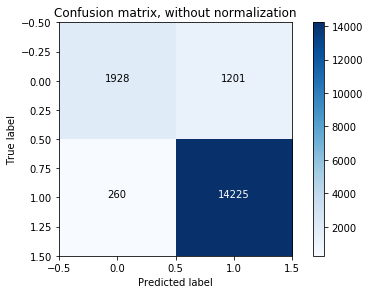

In [58]:
#Confusion Matrix model 2.3
cnf_matrix = confusion_matrix(y, CV3R_pred)
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')

### Limiting the Vocabulary (min_df, max_df)

average_precision_score 0.8485833115165526
roc_auc_score 0.5869188136458374


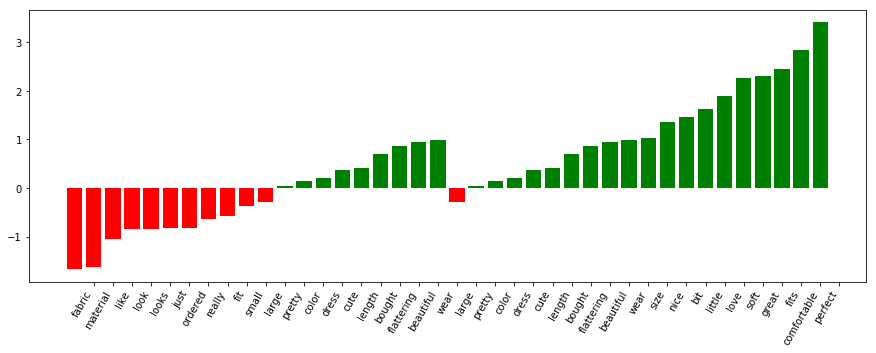

In [59]:
#Classification Modelling 2.4
X_TR = dataset['Title'] + [" "] + dataset['Review']
y = dataset["Recommended"]

vect = TfidfVectorizer(stop_words='english',min_df=0.1,max_df=0.85)
CV3R = vect.fit_transform(X_TR, y)
CV3R_fit = vect.fit(X_TR, y)

classifier = LogisticRegression(random_state=100)
classifier.fit(CV3R , y)

CV3R_pred = classifier.predict(CV3R)

print('average_precision_score', average_precision_score(y, CV3R_pred))
print('roc_auc_score', roc_auc_score(y, CV3R_pred))

top_features=20
feature_names=vect.get_feature_names()
coef = classifier.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-top_features:]
top_negative_coefficients = np.argsort(coef)[:top_features]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'green' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
plt.show()

Confusion matrix, without normalization
[[  623  2506]
 [  366 14119]]


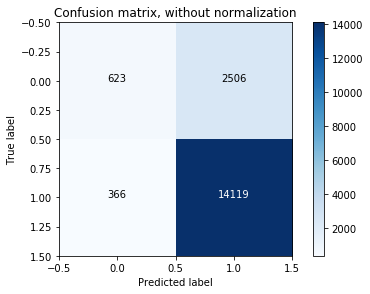

In [60]:
#Confusion Matrix model 2.4
cnf_matrix = confusion_matrix(y, CV3R_pred)
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')

### Observations Task 2

- 2.1  Using TfidfVectorizer instead of CountVectorizer. Does it change the score? Does it change the important coefficients?
- Ans Using TfidfVectorizer does decrease the precision score of the model as compared to CountVectorizer but the important features more or less remains the same with only minor differences. 

- 2.2 Does using a Normalizer with CountVectorizer change the outcome?
- Ans Using CountVectorizer with Normalizer does not change the outcome of the model as compared not using Normalizer with CountVectorer. 

- 2.3 Do the standard English stop-words help? Why / why not?
- Ans Using english Stop-words with the model does not affect the model precision significantly. Also, the feature selection of the models, the positive and negative words are also more or less the same. Because the stop- words are the most common words found in text data like no, not, a, the etc., these words mostly don't affect the feature selection unless we use bi-grams or higher range of n-grams for modelling.    

- 2.4 Limit the vocabulary using min_df or max_df. How to these impact the number of features, and how do they impact the scores?
- Ans We can limit the vocabulary of the dataset using min_df and max_df. The min_df is used for removing terms that appear too infrequently. The max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words". 

- Here the number of features have decreased. It all depends on the values you assign to the min_df and max_df functions. If min_df is increased the features decreases and if max_df is decreased the features decreases  and vice versa.

- The scores have also decreased from 0.92 to 0.84 precision score and also the AUC score has decreased. As we can see from the visualization of the features, it has changed and has become skewed.

## Task 3- N-grams

We will be using our current best model which is the CountVectorizer model for this task.

### Changing from Unigram to N-grams

average_precision_score 0.9960803190757805
roc_auc_score 0.9908916586768935


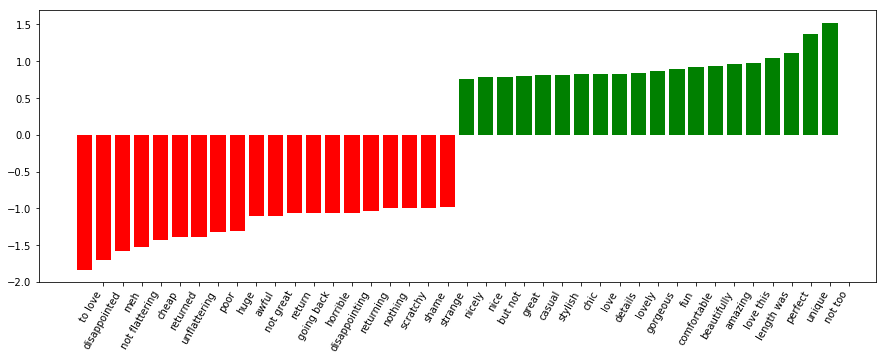

In [37]:
# Classification Modelling 3.1.1
X_TR = dataset['Title'] + [" "] + dataset['Review']
y = dataset["Recommended"]

vect = CountVectorizer(Normalizer, ngram_range=(1,2))
CV3R = vect.fit_transform(X_TR, y)
CV3R_fit = vect.fit(X_TR, y)

classifier = LogisticRegression(random_state=100)
classifier.fit(CV3R , y)

CV3R_pred = classifier.predict(CV3R)

print('average_precision_score', average_precision_score(y, CV3R_pred))
print('roc_auc_score', roc_auc_score(y, CV3R_pred))

top_features=20
feature_names=vect.get_feature_names()
coef = classifier.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-top_features:]
top_negative_coefficients = np.argsort(coef)[:top_features]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'green' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
plt.show()

Confusion matrix, without normalization
[[ 3072    57]
 [    0 14485]]


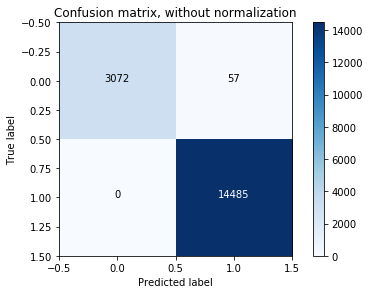

In [38]:
#Confusion Matrix model 3.1.1
cnf_matrix = confusion_matrix(y, CV3R_pred)
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')

average_precision_score 0.9960803190757805
roc_auc_score 0.9908916586768935


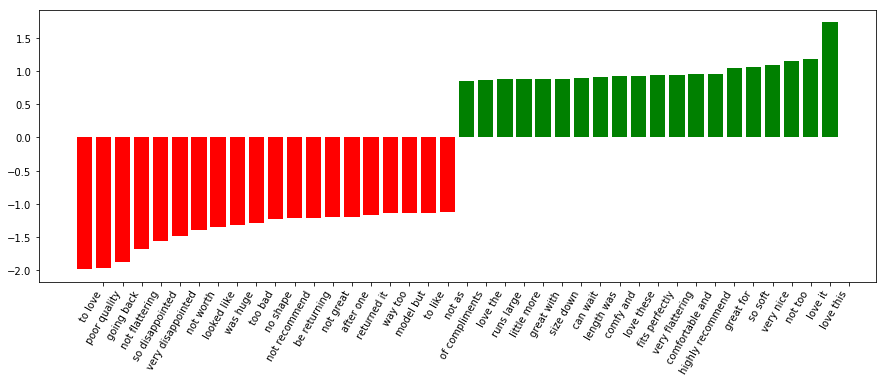

In [39]:
# Classification Modelling 3.1.2
X_TR = dataset['Title'] + [" "] + dataset['Review']
y = dataset["Recommended"]

vect = CountVectorizer(Normalizer, ngram_range=(2,2))
CV3R = vect.fit_transform(X_TR, y)
CV3R_fit = vect.fit(X_TR, y)

classifier = LogisticRegression(random_state=100)
classifier.fit(CV3R , y)

CV3R_pred = classifier.predict(CV3R)

print('average_precision_score', average_precision_score(y, CV3R_pred))
print('roc_auc_score', roc_auc_score(y, CV3R_pred))

top_features=20
feature_names=vect.get_feature_names()
coef = classifier.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-top_features:]
top_negative_coefficients = np.argsort(coef)[:top_features]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'green' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
plt.show()

Confusion matrix, without normalization
[[ 3072    57]
 [    0 14485]]


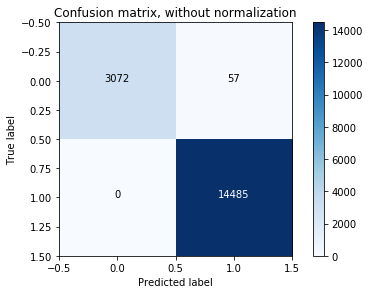

In [40]:
#Confusion Matrix model 3.1.2
cnf_matrix = confusion_matrix(y, CV3R_pred)
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')

average_precision_score 0.996285851846757
roc_auc_score 0.9913710450623202


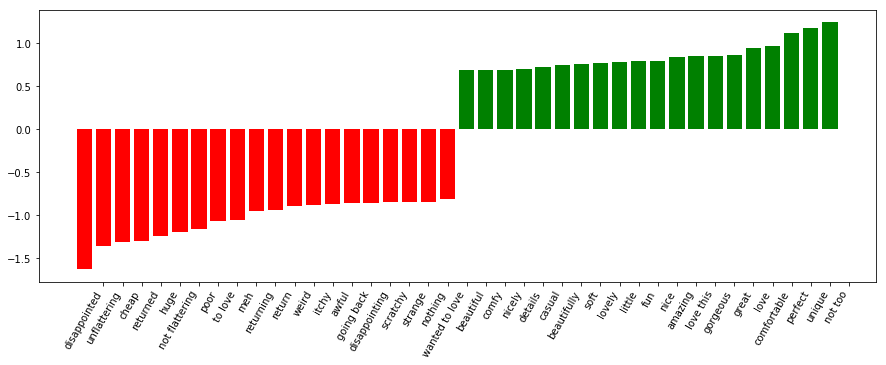

In [41]:
# Classification Modelling 3.1.3
X_TR = dataset['Title'] + [" "] + dataset['Review']
y = dataset["Recommended"]

vect = CountVectorizer(Normalizer, ngram_range=(1,3))
CV3R = vect.fit_transform(X_TR, y)
CV3R_fit = vect.fit(X_TR, y)

classifier = LogisticRegression(random_state=100)
classifier.fit(CV3R , y)

CV3R_pred = classifier.predict(CV3R)

print('average_precision_score', average_precision_score(y, CV3R_pred))
print('roc_auc_score', roc_auc_score(y, CV3R_pred))

top_features=20
feature_names=vect.get_feature_names()
coef = classifier.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-top_features:]
top_negative_coefficients = np.argsort(coef)[:top_features]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'green' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
plt.show()

Confusion matrix, without normalization
[[ 3075    54]
 [    0 14485]]


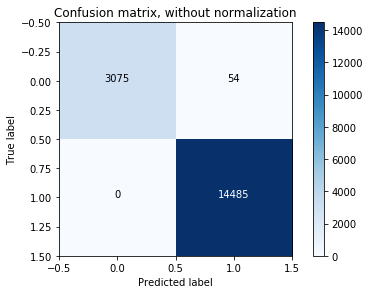

In [42]:
#Confusion Matrix model 3.1.3
cnf_matrix = confusion_matrix(y, CV3R_pred)
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')

average_precision_score 0.996285851846757
roc_auc_score 0.9913710450623202


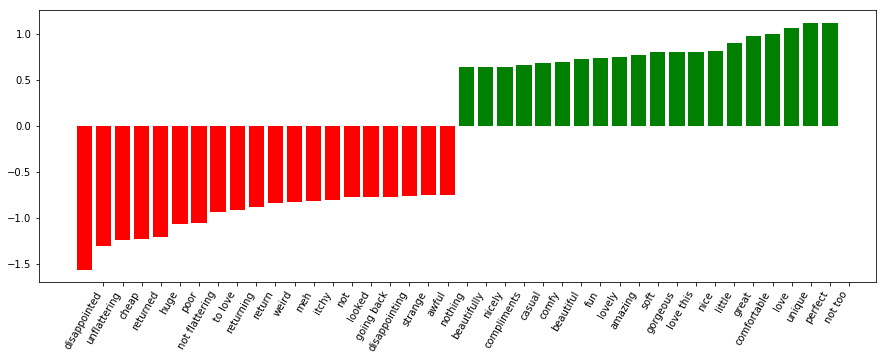

In [43]:
# Classificatio Modelling 3.1.4
X_TR = dataset['Title'] + [" "] + dataset['Review']
y = dataset["Recommended"]

vect = CountVectorizer(Normalizer, ngram_range=(1,4))
CV3R = vect.fit_transform(X_TR, y)
CV3R_fit = vect.fit(X_TR, y)

classifier = LogisticRegression(random_state=100)
classifier.fit(CV3R , y)

CV3R_pred = classifier.predict(CV3R)

print('average_precision_score', average_precision_score(y, CV3R_pred))
print('roc_auc_score', roc_auc_score(y, CV3R_pred))

top_features=20
feature_names=vect.get_feature_names()
coef = classifier.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-top_features:]
top_negative_coefficients = np.argsort(coef)[:top_features]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'green' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
plt.show()

Confusion matrix, without normalization
[[ 3075    54]
 [    0 14485]]


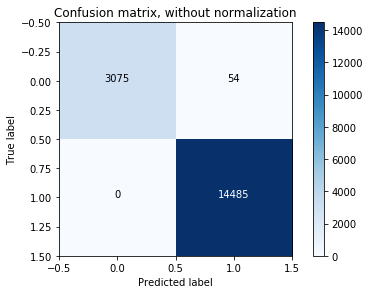

In [44]:
#Confusion Matrix model 3.1.4
cnf_matrix = confusion_matrix(y, CV3R_pred)
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')

### Using Character N-gram

average_precision_score 0.996285851846757
roc_auc_score 0.9913710450623202


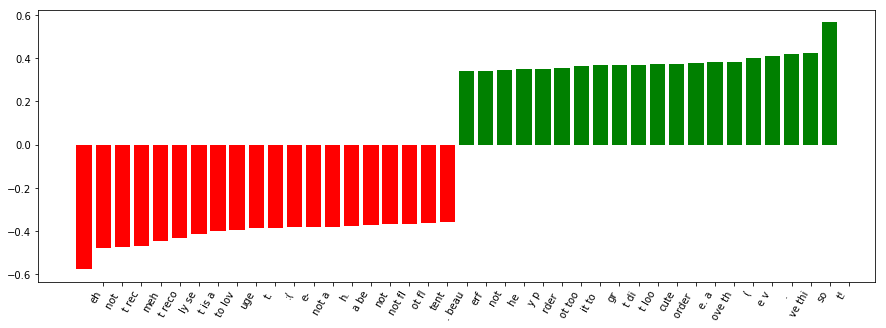

In [45]:
#Classification Modelling 3.2
X_TR = dataset['Title'] + [" "] + dataset['Review']
y = dataset["Recommended"]

vect = CountVectorizer(Normalizer, ngram_range=(2,6), analyzer='char', max_features=50000)
CV3R = vect.fit_transform(X_TR, y)
CV3R_fit = vect.fit(X_TR, y)

classifier = LogisticRegression(random_state=100)
classifier.fit(CV3R , y)

CV3R_pred = classifier.predict(CV3R)

print('average_precision_score', average_precision_score(y, CV3R_pred))
print('roc_auc_score', roc_auc_score(y, CV3R_pred))

top_features=20
feature_names=vect.get_feature_names()
coef = classifier.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-top_features:]
top_negative_coefficients = np.argsort(coef)[:top_features]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'green' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
plt.show()

Confusion matrix, without normalization
[[ 3075    54]
 [    0 14485]]


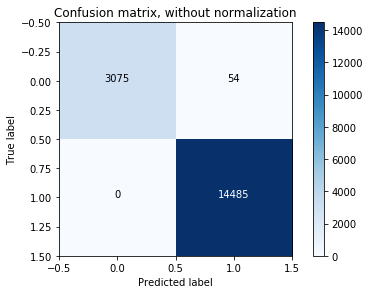

In [46]:
#Confusion Matrix model 3.2
cnf_matrix = confusion_matrix(y, CV3R_pred)
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')

### Using N-gram with stop-words and min_df

average_precision_score 0.9154423262278254
roc_auc_score 0.7851389448292517


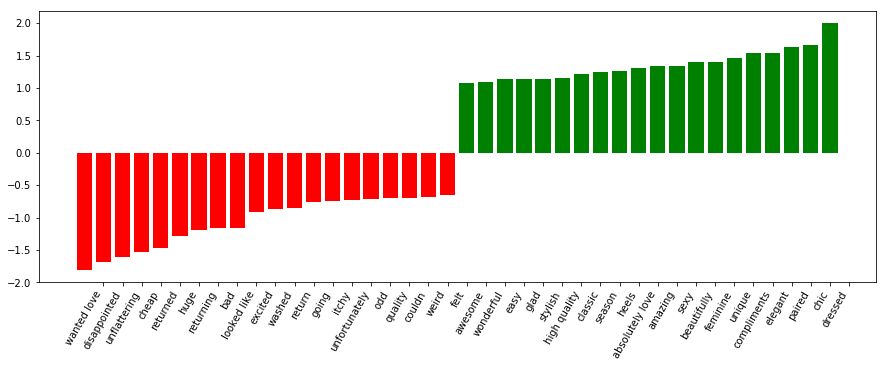

In [47]:
#Classification Modelling 3.3
X_TR = dataset['Title'] + [" "] + dataset['Review']
y = dataset["Recommended"]

vect = CountVectorizer(Normalizer, ngram_range=(1,2), min_df=0.01, stop_words='english', analyzer='word', max_features=10000)
CV3R = vect.fit_transform(X_TR, y)
CV3R_fit = vect.fit(X_TR, y)

classifier = LogisticRegression(random_state=100)
classifier.fit(CV3R , y)

CV3R_pred = classifier.predict(CV3R)

print('average_precision_score', average_precision_score(y, CV3R_pred))
print('roc_auc_score', roc_auc_score(y, CV3R_pred))

top_features=20
feature_names=vect.get_feature_names()
coef = classifier.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-top_features:]
top_negative_coefficients = np.argsort(coef)[:top_features]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'green' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
plt.show()

Confusion matrix, without normalization
[[ 1895  1234]
 [  512 13973]]


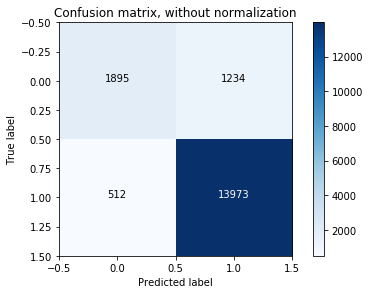

In [48]:
#Confusion Matrix model 3.3
cnf_matrix = confusion_matrix(y, CV3R_pred)
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')

### Observations Task 3 

- 3.1 Using your current best model, try changing from unigrams to n-grams of varying length. What provides the best performance?
- Ans we have used N-grams with varying ranges (1,2);(1,3);(1,4);(2,2). The n-gram provides the best resuts overall on almost all ranges but the bi-gram (2,2) range provides the best result. But i seriously think that the model is overfitted looking at the confusionmatrix and the very high accuracy i.e 0.99 

- 3.2 Using character n-grams. Visualize the coefficients. Can we learn something from this?
- Ans The character n-gram provides the feature selection based on each character and its combination with other. I think we need to remove the stop words here and also we can use the min_df and max_df to minimize the vocabulary to get a better result. The character n-gram also takes into consideration the smilies/ emoticons which is good thing. But i dont think this is reliable in the current scenario.

- 3.3 Investigate how min_df and the use of stop-words changes the number of features when using word n-grams, and how they change the score.
- Ans When using the stop-words we can eliminate the frequently occuring words in english which are used for sentence making and which not particularly describe an emotion/reaction and in turn decrease the number of unwanted features. The other part is when we remove some stop words for example "not good" is a negative emotion and when we remove 'not' from the phrase all its left with is 'good' which indeed is a positive semtiment, hence some times using stop words could lead a biased result.
- The min_df and max_df also has a similar effect on a dataset, which could some times give one a polar result of mostly positive or mostly negative by eliminating the words with lower and higher frequency of occurrence. Its a good option to minimize the vocabulary and features too. But we need to use it cautiously to avoid overfitting and underfitting of the model. 

## Task 4- Model Tuning 

Cross Validation and Splitting the dataset in train and test datasets 

### Using L1 penalty 

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


average_precision_score 0.9210596500514867
roc_auc_score 0.7989677580964986


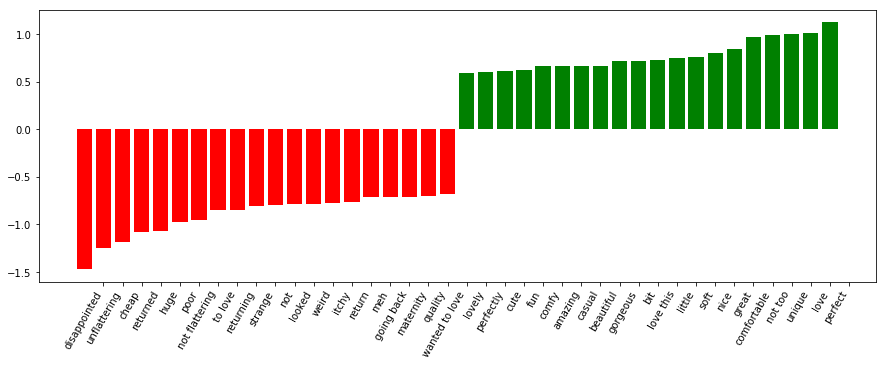

In [49]:
#4.1
from sklearn.cross_validation import train_test_split
X_TR = dataset['Title'] + [" "] + dataset['Review']
y = dataset["Recommended"]
X_TR_train, X_TR_test, y_train, y_test = train_test_split(X_TR, y, test_size = 0.2)

vect = CountVectorizer(Normalizer, ngram_range=(1,4))
vect.fit(X_TR_train)
X_train_dtm = vect.transform(X_TR_train)
X_test_dtm = vect.transform(X_TR_test)

classifier = LogisticRegression(random_state=100)
classifier.fit(X_train_dtm, y_train)

CV3R_pred = classifier.predict(X_test_dtm)

print('average_precision_score', average_precision_score(y_test, CV3R_pred))
print('roc_auc_score', roc_auc_score(y_test, CV3R_pred))

top_features=20
feature_names=vect.get_feature_names()
coef = classifier.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-top_features:]
top_negative_coefficients = np.argsort(coef)[:top_features]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'green' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
plt.show()

Confusion matrix, without normalization
[[ 394  228]
 [ 103 2798]]


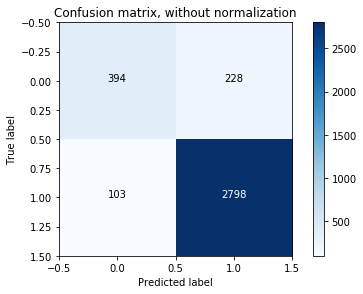

In [50]:
#Confusion Matrix model 4.1
cnf_matrix = confusion_matrix(y_test, CV3R_pred)
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')

### Using L1 penalty 

average_precision_score 0.9307521356854765
roc_auc_score 0.8205753743816582


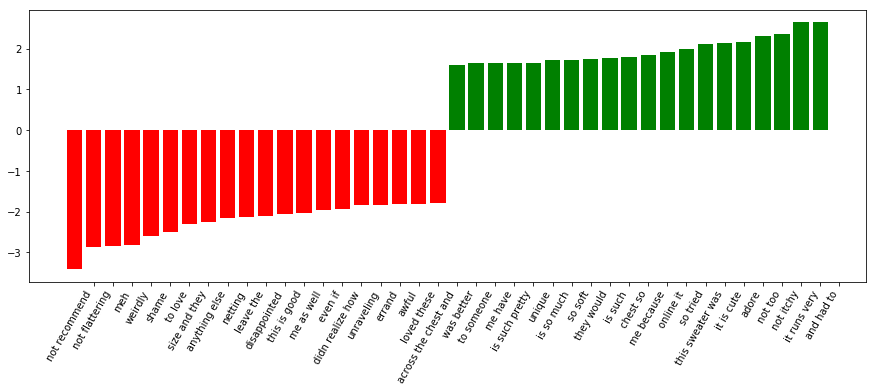

In [51]:
#4.2
X_TR = dataset['Title'] + [" "] + dataset['Review']
y = dataset["Recommended"]
X_TR_train, X_TR_test, y_train, y_test = train_test_split(X_TR, y, test_size = 0.2)

vect = CountVectorizer(Normalizer, ngram_range=(1,4))
vect.fit(X_TR_train)
X_train_dtm = vect.transform(X_TR_train)
X_test_dtm = vect.transform(X_TR_test)

classifier = LogisticRegression(penalty='l1',random_state=100)
classifier.fit(X_train_dtm, y_train)

CV3R_pred = classifier.predict(X_test_dtm)

print('average_precision_score', average_precision_score(y_test, CV3R_pred))
print('roc_auc_score', roc_auc_score(y_test, CV3R_pred))

top_features=20
feature_names=vect.get_feature_names()
coef = classifier.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-top_features:]
top_negative_coefficients = np.argsort(coef)[:top_features]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'green' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
plt.show()

Confusion matrix, without normalization
[[ 420  190]
 [ 138 2775]]


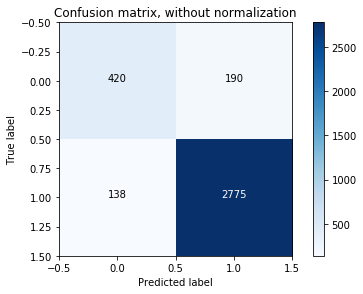

In [52]:
#Confusion Matrix model 4.2
cnf_matrix = confusion_matrix(y_test, CV3R_pred)
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')

### Using L2 penalty 

average_precision_score 0.9188231081296887
roc_auc_score 0.7987363344506202


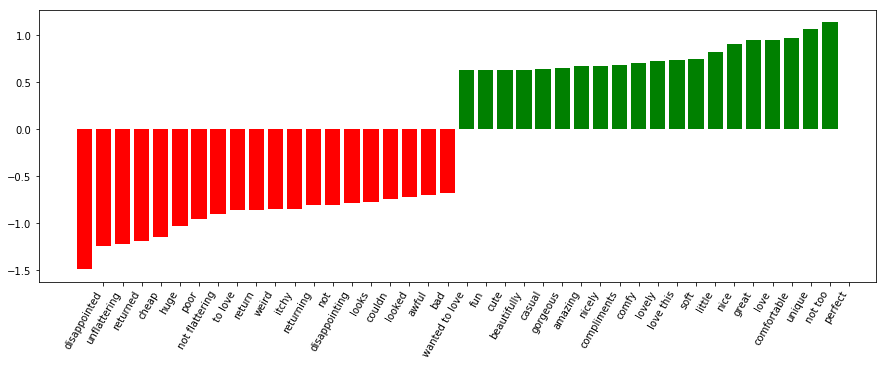

In [53]:
#4.3
X_TR = dataset['Title'] + [" "] + dataset['Review']
y = dataset["Recommended"]
X_TR_train, X_TR_test, y_train, y_test = train_test_split(X_TR, y, test_size = 0.2)

vect = CountVectorizer(Normalizer, ngram_range=(1,4))
vect.fit(X_TR_train)
X_train_dtm = vect.transform(X_TR_train)
X_test_dtm = vect.transform(X_TR_test)

classifier = LogisticRegression(penalty='l2',random_state=100)
classifier.fit(X_train_dtm, y_train)

CV3R_pred = classifier.predict(X_test_dtm)

print('average_precision_score', average_precision_score(y_test, CV3R_pred))
print('roc_auc_score', roc_auc_score(y_test, CV3R_pred))

top_features=20
feature_names=vect.get_feature_names()
coef = classifier.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-top_features:]
top_negative_coefficients = np.argsort(coef)[:top_features]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'green' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
plt.show()

Confusion matrix, without normalization
[[ 402  235]
 [  97 2789]]


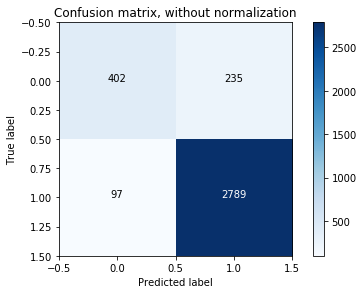

In [54]:
#Confusion Matrix model 4.3
cnf_matrix = confusion_matrix(y_test, CV3R_pred)
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')

### Observations Task 4

- 4.1 Are there any other obvious features to try, or combinations to try out? 
- Ans We can definetly use other models such as LinearSVC, MultinomialNB etc. 
- We can use the gridsearchcv to get a optimum combination of N-grams and min_df and max_df. 
- We can also use several other stop-word libraries in combination with english like spanish, Italian etc based on the dataset origin. 
- We can use analyzer during vaectorizing to determine whether the feature should be made of word or character n-grams or a combination of both char_wb. 